In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import sklearn
import random

## Dense Neural Network

## Question 1

In [ ]:
def xavier_initializer(shape):
    # Xavier/Glorot initialization
    return np.random.rand(*shape) * np.sqrt(2 / np.sum(shape))

In [ ]:
class ReLU:
    def __init__(self):
        pass
    def applyactivation(self,X):
        return np.maximum(0,np.array(X))
    def assignweights(self,a,b):
        return xavier_initializer((a,))
    def calculatepropagatinggradients(self,weights,storeactivation,labels,gdx):
        return np.where(storeactivation <= 0, 0, 1)*(np.array(weights)*np.tile(np.array(gdx), (len(weights), 1)).T)
    def help(self,X):
        return np.where(X <= 0, 0, 1)

In [ ]:
class Linear:
    def __init__(self):
        pass
    def applyactivation(self,X):
        return np.array(X)
    def propagateoutputgradient(self,weights,storeactivation,labels):
        return (np.array(weights) * np.tile(np.array((storeactivation - np.array(labels))) * (2 / len(list(labels))), (len(weights), 1)).T)
    def calculatepropagatinggradients(self,weights,storeactivation,labels,gdx):
        return (np.array(weights)*np.tile(np.array(gdx), (len(weights), 1)).T)
    def assignweights(self,a,b):
        # return np.random.rand(a)
        return xavier_initializer((a,))
    def cnngradient(self,q):
        return np.ones_like(q)
    def help(self,X):
        return np.ones_like(X)


In [ ]:
class Sigmoid:
    def __init__(self):
        pass
    def applyactivation(self,X):
        return 1 / (1 + np.exp(-X))
    def propagateoutputgradient(self,weights,storeactivation,labels):
        array1 = storeactivation
        return (1-array1[:, np.newaxis])*(array1[:, np.newaxis]*(np.array(weights) * np.tile(-1*(np.array(labels)-np.array(storeactivation)), (len(weights), 1)).T))
    def calculatepropagatinggradients(self,weights,storeactivation,labels,gdx):
        array1 = storeactivation
        # print((np.tile(np.array(gdx), (len(weights), 1)).T.shape,np.array(weights).shape,(np.array(weights)*np.tile(np.array(gdx), (len(weights), 1)).T).shape))
        # print(array1[:, np.newaxis].shape)
        # print((array1[:, np.newaxis]*(np.array(weights)*np.tile(np.array(gdx), (len(weights), 1)).T)).shape)
        return (1-array1[:, np.newaxis])*(array1[:, np.newaxis]*(np.array(weights)*np.tile(np.array(gdx), (len(weights), 1)).T))
    def assignweights(self,a,b):
        # return np.random.rand(a)
        return xavier_initializer((a,))
    def help(self,X):
        return np.array(X)*np.array((1-X))

In [ ]:
class Softmax:
    def __init__(self):
        pass
    def applyactivation(self,X):
        temp = np.exp(X)
        temp1 = temp/np.sum(temp,axis=1)[:, np.newaxis]
        return temp1
    def propagateoutputgradient(self,weights,storeactivation,labels):
        array1 = storeactivation
        P = storeactivation
        Y = labels
        # delta = np.eye(Y.shape[1])
        # gradient = -np.sum(Y[:, np.newaxis, :] * (delta - P[:, :, np.newaxis]), axis=2)
        gradient = P-Y
        def build_jacobean(row):
            temp = np.zeros((len(row),len(row)))
            for i in range(len(row)):
                for j in range(len(row)):
                    if i==j:
                        temp[i][j] = row[i]*(1-row[i])
                    else:
                        temp[i][j] = -1*row[i]*row[j]
            return temp
        temp1 = np.array([])
        for i in range(len(storeactivation)):
            tempfin = (weights@build_jacobean(storeactivation[i]))@(gradient[i].T)
            if i==0:
                temp1 = np.array([tempfin])
            else:
                temp1 = np.append(temp1,[tempfin],axis=0)

        return temp1
        # P = storeactivation
        # Y = labels
        # gradient = P - Y

        # def build_jacobian(row):
        #     return np.diag(row) - np.outer(row, row)

        # temp1 = np.array([np.dot(weights.T, build_jacobian(storeactivation[i]) @ gradient[i]) for i in range(len(storeactivation))])

        # return temp1
    def calculatepropagatinggradients(self,weights,storeactivation,labels,gdx):
        array1 = storeactivation
        return np.sum(((1-array1[:, np.newaxis])*(array1[:, np.newaxis]*(np.array(weights)*np.transpose(np.tile(np.array(gdx), (len(weights),1, 1)),(1,0,2))))),axis=2)
    def assignweights(self,a,b):
        # return np.random.rand(a,b)
        return xavier_initializer((a,b))
    def help(self,X):
        return

In [ ]:
np.append(np.array([[1,2]]),np.array([[1,2]]),axis=0)

array([[1, 2],
       [1, 2]])

In [ ]:
class Tanh:
    def __init__(self):
        pass
    def applyactivation(self,X):
        return np.tanh(X)
    def propagateoutputgradient(self,weights,storeactivation,labels):
        array1 = storeactivation
        return (1-(array1[:, np.newaxis])**2)*((np.array(weights) * np.tile(-1*(np.array(labels)-np.array(storeactivation)), (len(weights), 1)).T))
    def calculatepropagatinggradients(self,weights,storeactivation,labels,gdx):
        array1 = storeactivation
        return (1-(array1[:, np.newaxis])**2)*((np.array(weights)*np.tile(np.array(gdx), (len(weights), 1)).T))
    def assignweights(self,a,b):
        # return np.random.rand(a)
        return xavier_initializer((a,))
    def cnngradient(self,q):
        return 4*(q**2)
    def help(self,X):
        return 1 - np.array(X)**2

In [ ]:
class MeanSquaredLoss:
    def __init__(self):
        pass
    def calculateloss(self,X,y):
        return ((X-np.array(y))@((X-np.array(y))).T)/len(list(y))
    def gradient(self,X,y):
        return np.array((X-np.array(y)))*(2/len(list(y)))

In [ ]:
class CrossEntropyLoss:
    def __init__(self):
        pass
    def calculateloss(self,Q,y):
        epsilon = 1e-15
        Q_safe = np.maximum(Q, epsilon)
        temp = np.log(Q_safe) * y
        return -1 * np.sum(temp)
    def gradient(self,P,Y):
        # delta = np.eye(Y.shape[1])
        # gradient = -np.sum(Y[:, np.newaxis, :] * (delta - P[:, :, np.newaxis]), axis=2)
        # return gradient
        gradient = P-Y
        return gradient

In [ ]:
class BinaryCrossEntropyLoss:
    def __init__(self):
        pass
    def calculateloss(self,Q,y):
        temp1 = (np.array(y)).T@np.log(np.maximum(1e-15,Q))
        temp2 = temp2 = (np.ones(len(y)) - np.array(y)).T @ (np.log(np.maximum(1e-15, np.ones(len(Q)) - np.array(Q))))
        return (-1*(temp1+temp2))/len(y)
    def gradient(self,X,y):
        temp = -1*(np.array(y)-np.array(X))
        return temp


In [ ]:
class MeanSquaredLossSigmoid:
    def __init__(self):
        pass
    def calculateloss(self,X,y):
        return ((X-np.array(y))@((X-np.array(y))).T)/len(list(y))
    def gradient(self,X,y):
        # return np.array((X-np.array(y)))*(2/len(list(y)))
        return 2*np.array(X-np.array(y))*np.array(X)*(1-np.array(X))


In [ ]:
class SigmoidMSE:
    def __init__(self):
        pass
    def applyactivation(self,X):
        return 1 / (1 + np.exp(-X))
    def propagateoutputgradient(self,weights,storeactivation,labels):
        array1 = storeactivation
        return (1-array1[:, np.newaxis])*(array1[:, np.newaxis]*(np.array(weights) * np.tile(2*np.array(storeactivation-np.array(labels))*np.array(storeactivation)*(1-np.array(storeactivation)), (len(weights), 1)).T))
    def calculatepropagatinggradients(self,weights,storeactivation,labels,gdx):
        array1 = storeactivation
        return (1-array1[:, np.newaxis])*(array1[:, np.newaxis]*(np.array(weights)*np.tile(np.array(gdx), (len(weights), 1)).T))
    def assignweights(self,a,b):
        # return np.random.rand(a)
        return xavier_initializer((a,))

In [ ]:
class Neuron:
  def __init__(self,X=None,y=None,lr=0.001,neurontype="dense",activation=None,lossfunction=None,classificationfeatures=None):
    self.data = X
    self.labels = y
    self.weights = None
    self.bias = np.random.rand(1)
    self.neurontype = neurontype
    self.y = y
    self.lr = lr
    self.storeforward = None
    self.storeactivation = None
    self.activation = activation
    self.lossfunction = lossfunction
    self.calculateddLdX = None
    self.loss = None
    self.gdx=None
    self.hello1 = None
    self.passed = False
  def forwardpass(self,mode=None):
    wixi = self.data
    wixi = (np.array(self.data)@np.array(self.weights))
    wib = wixi+self.bias
    self.storeforward = wib
    self.storeactivation = self.activation().applyactivation(wib)
    if self.neurontype=="output":
      if mode!="predict":
        # print(self.labels.shape)
        self.loss = self.lossfunction().calculateloss(self.storeactivation,self.labels)

  def calculatedLdX(self):
    if self.neurontype=="output":
      return self.activation().propagateoutputgradient(self.weights,self.storeactivation,self.labels)
    else:
      # print(self.weights.shape)
      # return self.activation().calculatepropagatinggradients(self.weights,self.storeactivation,self.labels,self.hello1)
      return self.activation().calculatepropagatinggradients(self.weights,self.storeactivation,self.labels,self.gdx)

  def backwardpass(self,gradientx=None):
    self.gdx = gradientx
    if self.neurontype=="output":
      weight_gradient = 0
      bias_gradient = 0
      loss = self.lossfunction().calculateloss(self.storeactivation,self.labels)
      temp = self.lossfunction().gradient(self.storeactivation,self.labels)
      weight_gradient = (((self.data).T)@temp)
      bias_gradient = np.sum(temp)
      self.weights -=self.lr*weight_gradient
      self.bias -=self.lr*bias_gradient
      return self.calculatedLdX()
    elif self.neurontype=="dense":
      weight_gradient = 0
      bias_gradient = 0
      # self.temp = np.sum(gradientx)
      # self.temp = gradientx
      hello = gradientx*self.activation().help(self.storeactivation)
      self.hello1 = hello
      weight_gradient = ((self.data).T)@hello
      bias_gradient = np.sum(hello)

      self.weights -=self.lr*weight_gradient
      self.bias -=self.lr*bias_gradient
      return self.calculatedLdX()
    elif self.neurontype=="input":
      weight_gradient = 0
      bias_gradient = 0
      self.temp = np.sum(gradientx)
      self.weights -=self.lr*weight_gradient
      self.bias -=self.lr*bias_gradient
      return self.calculatedLdX()

In [ ]:
class Layer:
  def __init__(self,previous=None,next=None,inputdata=None,ytrain=None,layertype="output",noofneurons=1,lr=0.001,activation=None,lossfunction=None,classificationfeatures=None,isinputlayer=False):
    self.layertype = layertype
    self.noofneurons = noofneurons
    self.architecture=[]
    self.isinputlayer = isinputlayer
    self.forwardassist = inputdata
    self.forwardstore = None
    self.backwardassist = None
    self.backwardstore = None
    self.next = next
    self.ytrain = ytrain
    self.previous = previous
    self.classificationfeatures = classificationfeatures
    self.activation = activation
    self.lossfunction = lossfunction
    for i in range(noofneurons):
      self.architecture.append(Neuron(X=None,y=ytrain,lr=lr,neurontype=layertype,activation=activation,lossfunction=lossfunction,classificationfeatures=classificationfeatures))
  def feedytrain(self):
    if self.noofneurons==1:
      for i in range(self.noofneurons):
        self.architecture[i].labels = self.ytrain
    else:
      temp = self.ytrain.T
      # print(temp.shape)
      for i in range(self.noofneurons):
        self.architecture[i].labels = temp[i]

  def forwardpass(self,mode=None):
    inputs = self.forwardassist
    if self.previous == None:
      outputs = []
      for i in range(self.noofneurons):
        self.architecture[i].data = np.array(inputs.T[i].T)[:, np.newaxis]
        if self.architecture[i].weights == None:
          if self.previous==None:
            if not self.classificationfeatures:
              self.architecture[i].weights = np.ones(1)
              self.architecture[i].bias = 0
            else:
              self.architecture[i].weights = self.activation().assignweights(1,self.classificationfeatures)
            self.architecture[i].passed = True
          else:
            if not self.classificationfeatures:
              self.architecture[i].weights = self.activation().assignweights(self.previous,0)
            else:
              self.architecture[i].weights = self.activation().assignweights(self.previous,self.classificationfeatures)
            self.architecture[i].passed = True
        self.architecture[i].forwardpass(mode=mode)
        outputs.append(self.architecture[i].storeactivation)
      outputs = np.array(outputs).T
      result = outputs
      self.forwardstore = result
    else:
      outputs = []
      for i in range(self.noofneurons):
        self.architecture[i].data = inputs[i]
        if self.architecture[i].passed == False:
          if self.previous==None:
            if not self.classificationfeatures:
              self.architecture[i].weights = np.ones(1)
              self.architecture[i].bias = 0
            else:
              self.architecture[i].weights = self.activation().assignweights(1,self.classificationfeatures)
            self.architecture[i].passed = True
          else:
            if not self.classificationfeatures:
              self.architecture[i].weights = self.activation().assignweights(self.previous,0)
            else:
              self.architecture[i].weights = self.activation().assignweights(self.previous,self.classificationfeatures)
            self.architecture[i].passed = True
        self.architecture[i].forwardpass(mode=mode)
        outputs.append(self.architecture[i].storeactivation)
      outputs = np.array(outputs).T
      if self.next!=None:
        result = outputs
        self.forwardstore=result
      else:
        self.forwardstore=np.squeeze(outputs)



    self.forwardstore = outputs
    return self.forwardstore
  def backwardpass(self):
    outputs = []
    if self.layertype=="output":
      for i in range(self.noofneurons):
        outputs.append(self.architecture[i].backwardpass())
        # temp1 = np.sum(np.array(outputs),axis=0)
      temp1 = np.sum(np.array(outputs),axis=0)
      # self.backwardstore = temp1
      self.backwardstore = temp1.T

    else:
      gradientx = self.backwardassist
      for i in range(self.noofneurons):
        self.architecture[i].isgdx=True
        outputs.append(self.architecture[i].backwardpass(gradientx[i]))
        # print(gradientx.shape)
      temp1 = np.sum(np.array(outputs),axis=0)
      # self.backwardstore = temp1
      self.backwardstore = temp1.T
    return self.backwardstore


In [ ]:
class NeuralNetwork:
  def __init__(self,layers,inputdata,y_train,randomseed=42,threshold=1e-3,inputActivationAssist=None):
    random.seed(randomseed)
    self.threshold = threshold
    self.layers = layers
    self.layers[0].forwardassist = inputdata.to_numpy()
    self.layers[0].isinputlayer = True
    self.layers[len(layers)-1].ytrain = y_train
    self.layers[len(layers)-1].feedytrain()
    self.losses = []
    self.iterations = 0
    start = 1
    end = len(self.layers)-1
    while start<=end:
      self.layers[start].previous = self.layers[start-1].noofneurons
      start+=1
    start = 0
    end = len(self.layers)-1
    while start<end:
      self.layers[start].next = self.layers[start+1].noofneurons
      start+=1
  def __lossplot__(self):
    plt.style.use('dark_background')
    fig, axs = plt.subplots(1, 1)
    axs.set_title("Loss vs total Forward Passes")
    for i, update in enumerate([self.losses]):
        axs.plot(update)
    plt.show()
  def __predict__(self,X,y=None):
    self.layers[0].forwardassist = np.array([X])
    self.forwardpass(mode="predict")
    # print("The Prediction for the given X is:",self.layers[len(self.layers)-1].forwardstore)
    if y:
      # print("The original output value of the given X is:",y)
      pass
    return self.layers[len(self.layers)-1].forwardstore
  def forwardpass(self,mode=None):
    start = 0
    end = len(self.layers)-1
    while start<=end:
      self.layers[start].forwardpass(mode=mode)
      start+=1
      if start<=end:
        temp = self.layers[start].noofneurons
        self.layers[start].forwardassist = np.tile(self.layers[start-1].forwardstore[np.newaxis, :, :], (self.layers[start].noofneurons, 1, 1))
      if start==end+1:
        # self.layers[end].forwardstore = self.layers[end].forwardstore[0]
        self.layers[end].forwardstore = np.squeeze(self.layers[end].forwardstore)
    lt = self.layers[end].architecture[0].loss
    return lt
  def backwardpass(self):
    start = len(self.layers)-1
    self.iterations+=1
    end = 0
    while start>end:
      self.layers[start].backwardpass()
      start-=1
      if start>=end:
        temp = self.layers[start].noofneurons
        # self.layers[start].backwardstore = self.layers[start+1].backwardassist
        self.layers[start].backwardassist = self.layers[start+1].backwardstore
    loss4 = self.forwardpass()
    self.losses.append(loss4)
    return
  def train(self):
    loss = self.forwardpass()
    iterations = 0
    while loss>0:
      iterations+=1
      self.backwardpass()
      loss1 = self.forwardpass()
      if abs(loss1-loss)<self.threshold:
        break
      loss = loss1
    print(f"Converged in {iterations} epochs.")
    print("final loss is :",loss)

In [ ]:
def one_hot_encode(array):
    unique_values = np.unique(array)
    num_classes = len(unique_values)
    encoded_array = np.zeros((len(array), num_classes))
    for i, value in enumerate(array):
        index = np.where(unique_values == value)[0][0]
        encoded_array[i, index] = 1
    return encoded_array

In [ ]:
def StochasticGradientDescent(model,X,y,maxiterations):
    for i in tqdm(range(maxiterations),desc="Iterations"):
        for j in range(len(X)):
            model.layers[0].forwardassist = np.array([X[j]])
            model.layers[len(model.layers)-1].ytrain = np.array([y[j]])
            model.layers[len(model.layers)-1].feedytrain()
            # print("Hi")
            model.forwardpass()
            model.backwardpass()
            # print("Bye")
    model.layers[0].forwardassist = np.array(X)
    model.layers[len(model.layers)-1].ytrain = np.array(y)
    model.layers[len(model.layers)-1].feedytrain()
    # model.layers[len(model.layers)-1].architecture[0].labels = np.array(y)
    losstemp = model.forwardpass()
    print(f"loss after training of samples is:",losstemp)
    model.__lossplot__()
    return model

## Question 2

a)

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
df = fetch_california_housing()
def normalize_data(X):
    scaler = StandardScaler()
    normalized_X = scaler.fit_transform(X)
    return pd.DataFrame(normalized_X, columns=X.columns)
X = normalize_data(pd.DataFrame(df["data"]))
X = X.to_numpy()
y = df["target"]
df = pd.DataFrame(X)
df["y"] = y

C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` in

In [ ]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data_boston = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
result_boston = raw_df.values[1::2, 2]
data = {'data': data_boston, 'target': result_boston}
X = normalize_data(pd.DataFrame(data["data"]))
X = X.to_numpy()
y = data["target"]
df = pd.DataFrame(X)
df["y"] = y



C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` in

In [ ]:
network1 = NeuralNetwork([Layer(layertype="input",noofneurons=13,activation=Linear),Layer(layertype="output",noofneurons=1,activation=Linear,lossfunction=MeanSquaredLoss,lr=0.001)],inputdata=df.drop("y",axis=1),y_train= np.array(df["y"]))

In [ ]:
network1.forwardpass()

598.4908952994541

Iterations: 100%|██████████| 20/20 [00:05<00:00,  3.93it/s]

loss after training of samples is: 22.45698097007137


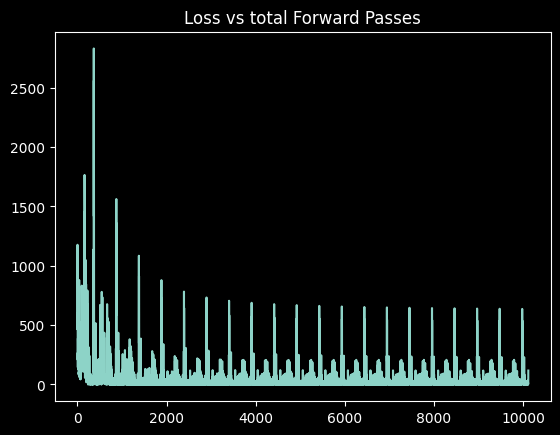

In [ ]:
StochasticGradientDescent(network1,df.drop("y",axis=1).to_numpy(),np.array(df["y"]),20)

In [ ]:
network1.forwardpass()

22.45698097007137

In [ ]:
network1.__predict__(df.drop("y",axis=1).to_numpy()[10],np.array(df["y"])[10])

array(18.268863)

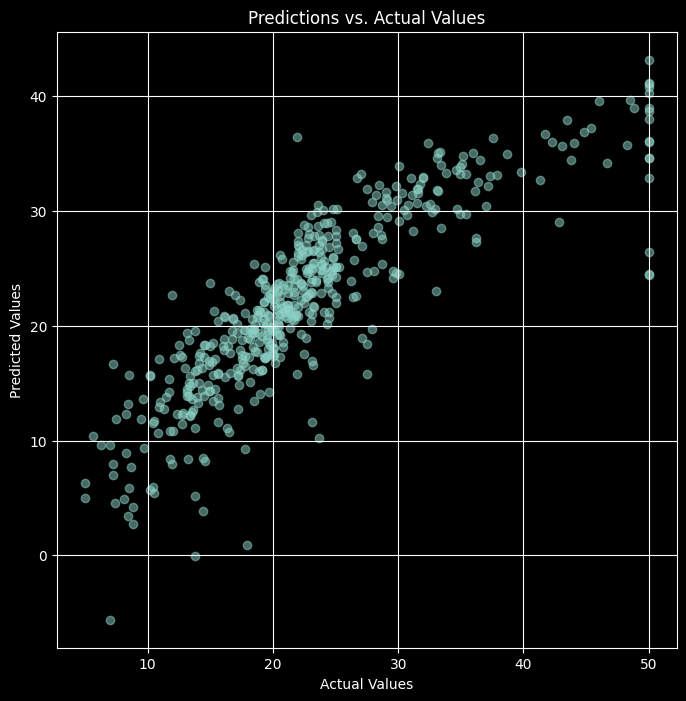

In [ ]:
preds = []
actuals = []
for i in range(len(df.drop("y",axis=1).to_numpy())):
    pred1 = network1.__predict__(df.drop("y",axis=1).to_numpy()[i],np.array(df["y"])[i])
    preds.append(pred1)
    actuals.append(np.array(df["y"])[i])
plt.figure(figsize=(8, 8))
plt.scatter(actuals, preds, alpha=0.5)
plt.title('Predictions vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

b)

In [ ]:
network1 = NeuralNetwork([Layer(layertype="input",noofneurons=13,activation=Linear),Layer(layertype="dense",noofneurons=13,activation=Sigmoid,lr=0.001),Layer(layertype="output",noofneurons=1,activation=Linear,lossfunction=MeanSquaredLoss,lr=0.001)],inputdata=df.drop("y",axis=1),y_train= np.array(df["y"]))

In [ ]:
network1.forwardpass()

515.223254757199

Iterations: 100%|██████████| 20/20 [00:12<00:00,  1.61it/s]

loss after training of samples is: 12.409220717013227


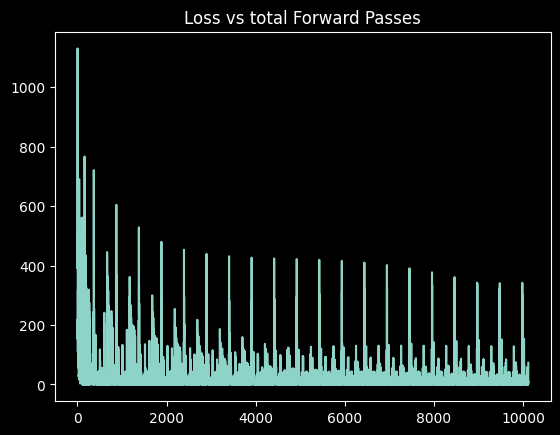

In [ ]:
StochasticGradientDescent(network1,df.drop("y",axis=1).to_numpy(),np.array(df["y"]),20)

In [ ]:
network1.__predict__(df.drop("y",axis=1).to_numpy()[10],np.array(df["y"])[10])

array(16.36873691)

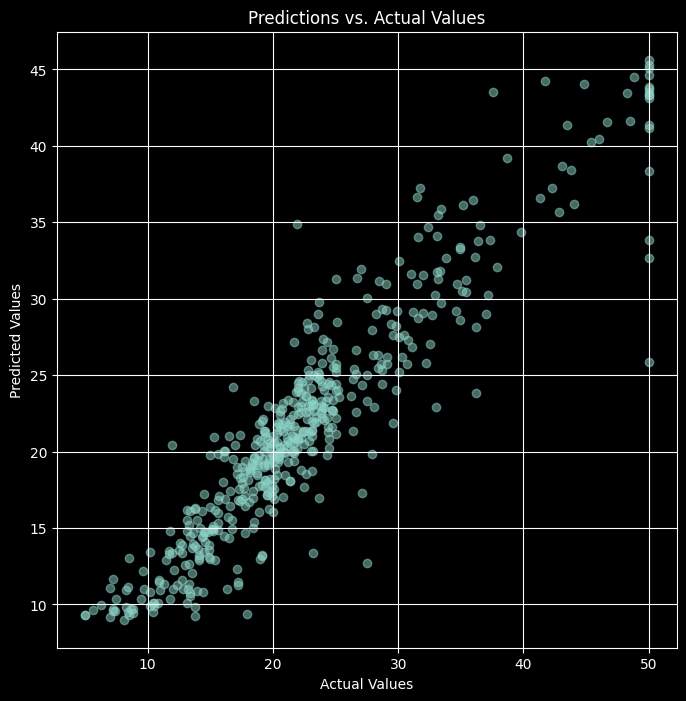

In [ ]:
preds = []
actuals = []
for i in range(len(df.drop("y",axis=1).to_numpy())):
    pred1 = network1.__predict__(df.drop("y",axis=1).to_numpy()[i],np.array(df["y"])[i])
    preds.append(pred1)
    actuals.append(np.array(df["y"])[i])
plt.figure(figsize=(8, 8))
plt.scatter(actuals, preds, alpha=0.5)
plt.title('Predictions vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

c)

In [ ]:
network1 = NeuralNetwork([Layer(layertype="input",noofneurons=13,activation=Linear),Layer(layertype="dense",noofneurons=13,activation=Sigmoid,lr=0.1),Layer(layertype="dense",noofneurons=13,activation=Sigmoid,lr=0.001),Layer(layertype="output",noofneurons=1,activation=Linear,lossfunction=MeanSquaredLoss,lr=0.001)],inputdata=df.drop("y",axis=1),y_train= np.array(df["y"]))

In [ ]:
network1.forwardpass()

495.0359503389175

Iterations: 100%|██████████| 10/10 [00:10<00:00,  1.08s/it]

loss after training of samples is: 17.0139809199008


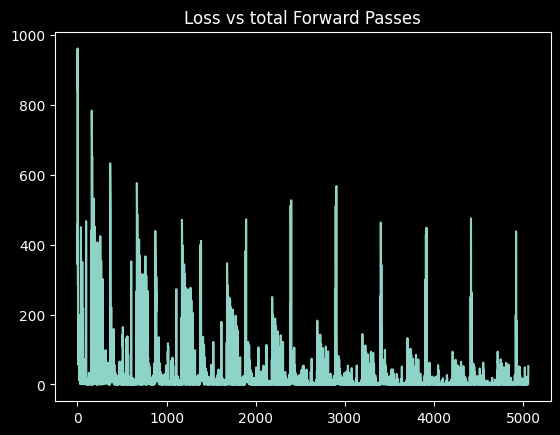

In [ ]:
StochasticGradientDescent(network1,df.drop("y",axis=1).to_numpy(),np.array(df["y"]),10)

In [ ]:
network1.__predict__(df.drop("y",axis=1).to_numpy()[10],np.array(df["y"])[10])

array(16.99416763)

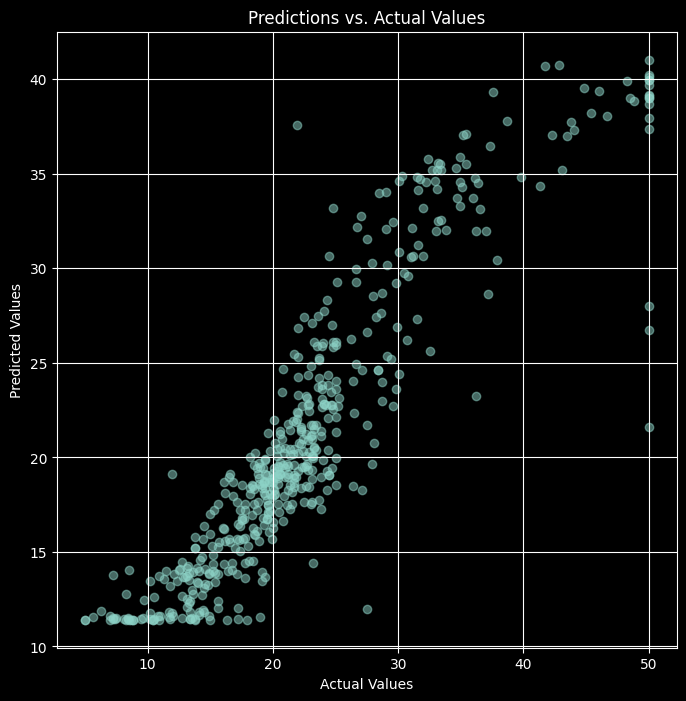

In [ ]:
preds = []
actuals = []
for i in range(len(df.drop("y",axis=1).to_numpy())):
    pred1 = network1.__predict__(df.drop("y",axis=1).to_numpy()[i],np.array(df["y"])[i])
    preds.append(pred1)
    actuals.append(np.array(df["y"])[i])
plt.figure(figsize=(8, 8))
plt.scatter(actuals, preds, alpha=0.5)
plt.title('Predictions vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

## Question 3

a)

In [ ]:
from sklearn.datasets import load_digits
df = load_digits()
X = df["data"]
y = df["target"]
# X = 1*(X >= 8)
X = X/255
multilevels = len(np.unique(y))
y = one_hot_encode(y)
df = pd.DataFrame(X)

In [ ]:
network2 = NeuralNetwork([Layer(layertype="input",noofneurons=64,activation=Linear,lr=0.1),Layer(layertype="dense",noofneurons=89,activation=Tanh,lr=0.1),Layer(layertype="output",noofneurons=10,activation=SigmoidMSE,lossfunction=MeanSquaredLossSigmoid,lr=0.1)],inputdata=df,y_train= np.array(y))

In [ ]:
# ,Layer(layertype="dense",noofneurons=89,activation=Tanh,lr=0.0000005)

In [ ]:
def StochasticGradientDescent(model,X,y,maxiterations):
    # for i in tqdm(range(maxiterations),desc="Iterations"):
    for k in tqdm(range(maxiterations)):
        j = k%len(X)
        model.layers[0].forwardassist = np.array([X[j]])
        model.layers[len(model.layers)-1].ytrain = np.array([y[j]])
        model.layers[len(model.layers)-1].feedytrain()
        model.forwardpass()
        model.backwardpass()
    model.layers[0].forwardassist = np.array(X)
    model.layers[len(model.layers)-1].ytrain = np.array(y)
    model.layers[len(model.layers)-1].feedytrain()
    losstemp = model.forwardpass()
    print(f"loss after training of samples is:",losstemp)
    model.__lossplot__()
    return model

100%|██████████| 62000/62000 [05:18<00:00, 194.74it/s]


loss after training of samples is: 0.009694516863083293


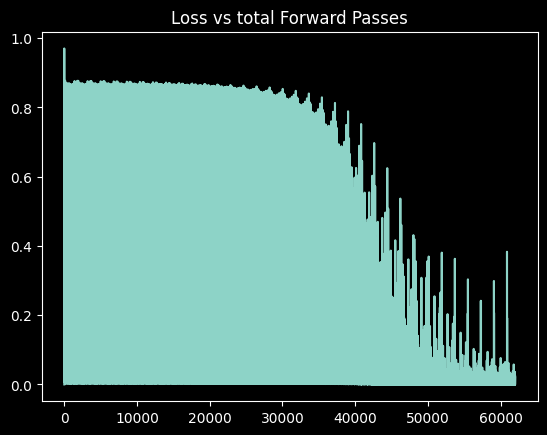

In [ ]:
StochasticGradientDescent(network2,df.to_numpy(),np.array(y),62000)

In [ ]:
network2.forwardpass()

0.009694516863083293

In [ ]:
y[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
network2.__predict__(df.to_numpy()[0])

array([8.92753819e-01, 6.51768916e-05, 5.00499913e-03, 5.76722821e-03,
       1.50371617e-02, 9.76270880e-02, 5.16525052e-03, 1.99315900e-02,
       4.87537203e-02, 6.53268723e-01])

In [ ]:
correct = 0
incorrect = 0
for i in range(len(df.to_numpy())):
    pred1 = network2.__predict__(df.to_numpy()[i])
    temp = np.argmax(pred1)
    temp1 = np.argmax(y[i])
    if temp==temp1:
        correct+=1
    else:
        incorrect+=1

print(f"The accuracy of the trained model is: {correct*100/(correct+incorrect)}%")

The accuracy of the trained model is: 66.110183639399%


In [ ]:
from sklearn.datasets import load_digits
df = load_digits()
X = df["data"]
y = df["target"]
X = X/255
# X = 1*(X >= 8)
multilevels = len(np.unique(y))
y = one_hot_encode(y)

In [ ]:
network3 = NeuralNetwork([Layer(layertype="input",noofneurons=8*8,activation=Linear,lr=0.1),Layer(layertype="dense",noofneurons=89,activation=Tanh,lr=0.1),Layer(layertype="output",noofneurons=1,activation=Softmax,lossfunction=CrossEntropyLoss,lr=0.1,classificationfeatures=10)],inputdata=pd.DataFrame(X),y_train= np.array(y),threshold=1e-3)

In [ ]:
# ,Layer(layertype="dense",noofneurons=89,activation=Tanh,lr=0.00001),Layer(layertype="dense",noofneurons=10,activation=Linear,lr=0.00001)

In [ ]:
network3.forwardpass()

4169.718697465211

100%|██████████| 5000/5000 [00:22<00:00, 222.16it/s]


loss after training of samples is: 3804.2001537997608


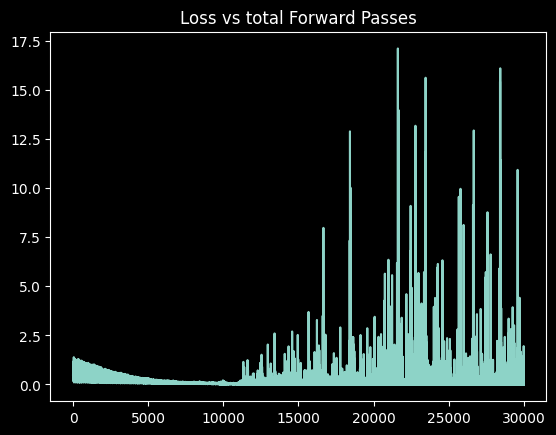

In [ ]:
StochasticGradientDescent(network3,X,y,30000)

In [ ]:
network3.__predict__(X[0])

In [ ]:
y[0]

In [ ]:
correct = 0
incorrect = 0
for i in range(len(X)):
    pred1 = network3.__predict__(X[i])
    temp = np.argmax(pred1)
    temp1 = np.argmax(y[i])
    if temp==temp1:
        correct+=1
    else:
        incorrect+=1

print(f"The accuracy of the trained model is: {correct*100/(correct+incorrect)}")

The accuracy of the trained model is: 56.705620478575405


## Question 4

## Convolutional Neural Network

In [ ]:
class ConvolutionLayer:
    def __init__(self,input_data,input_shape,pad_size = 1,filter_size=None,input_channels=None,output_channels=None,lr=0.001,activation=None):
        self.image = input_data
        self.backup = input_data.copy()
        self.activation = activation
        self.size = input_shape
        self.filter = np.random.random((filter_size,filter_size))
        self.filter_size = filter_size
        self.dl_dout = None
        self.pad_size = pad_size
        self.lr = lr
        self.datapasser = None
    def padding(self):
        arr = self.image

        filter_size = self.filter_size
        p = filter_size // 2
        n = len(arr)
        p_n = n + 2 * p
        padded_img = np.zeros(shape=(p_n, p_n))
        for i in range(n):
            for j in range(n):
                padded_img[i + p][j + p] = arr[i][j]
        return padded_img
    def paddingone(self,arr1):
        arr = arr1

        filter_size = self.filter_size
        p = filter_size // 2
        n = len(arr)
        p_n = n + 2 * p
        padded_img = np.zeros(shape=(p_n, p_n))
        for i in range(n):
            for j in range(n):
                padded_img[i + p][j + p] = arr[i][j]
        return padded_img

    def computation(self,arr2, filters):
        ans = 0
        for i in range(len(arr2)):
            for j in range(len(arr2[0])):
                ans += arr2[i][j] * filters[i][j]
        return ans
    def forward_pass(self):
        pad_size = len(self.filter)
        n = self.size[0]
        filters = self.filter
        self.image = self.padding()
        arr1 = self.image
        output_img = np.zeros(shape=(n, n))
        for i in range(n):
            for j in range(n):
                output_img[i][j] = self.computation(arr1[i:i + pad_size, j:j + pad_size], filters)
        self.image = output_img
        self.datapasser = self.image.copy().reshape(-1)
        output_img = self.activation().applyactivation(output_img)
        return output_img
    def reverse_filter(self):
        filter = self.filter
        n = len(filter)
        reversed_filter = np.zeros(shape=(n, n))
        for i in range(n):
            for j in range(n):
                reversed_filter[i][j] = filter[n - i - 1][n - j - 1]
        return reversed_filter
    def backward_pass(self):
        arr1 = self.image
        pad_size = len(self.filter)
        dl_dout = self.dl_dout
        filter = self.filter
        dl_dx = np.zeros(shape = self.size)
        reversed_filter = self.reverse_filter()
        pad_dl_dout = self.paddingone(dl_dout)
        n = self.size[0]
        for i in range(n):
            for j in range(n):
                dl_dx[i][j] = self.computation(pad_dl_dout[i:i + pad_size, j:j + pad_size], reversed_filter)

        m = len(filter)
        dl_dw = np.zeros(shape=(m, m))
        for i in range(m):
            for j in range(m):
                dl_dw[i][j] = self.computation(pad_dl_dout[i:i + pad_size, j:j + pad_size], arr1)
        self.filter-=self.lr*dl_dw
        self.image = self.backup.copy()
        return dl_dw, dl_dx


In [ ]:
class ConvolutionalNeuralNetwork:
    def __init__(self,input_data,y,Conv,Network,threshold=1e-3):
        self.Conv = Conv
        self.Network = Network
        self.input_data = input_data
        self.labels = y
        self.losses = []
        self.threshold = threshold
    def forwardpass(self):
        self.Conv.image = self.input_data
        self.Conv.backup = self.input_data.copy()
        # self.Conv.forward_pass()
        next_pass_data = self.Conv.forward_pass().reshape(-1)
        # next_pass_data = self.Conv.datapasser
        self.Network.layers[0].forwardassist = np.array([next_pass_data])
        self.Network.layers[len(self.Network.layers)-1].ytrain = np.array([self.labels])
        self.Network.layers[len(self.Network.layers)-1].feedytrain()
        loss = self.Network.forwardpass()
        return loss
    def backwardpass(self):
        self.Network.backwardpass()
        dl_dout = self.Network.layers[0].backwardassist
        temp9 = self.Conv.activation().cnngradient(self.Conv.datapasser)[:, np.newaxis]
        dl_dout = dl_dout*temp9
        self.Conv.dl_dout = dl_dout.reshape(self.Conv.size)
        self.Conv.backward_pass()
        loss = self.forwardpass()
        self.losses.append(loss)
        self.Conv.image = self.Conv.backup
        return
    def predict(self,X,y=None):
        self.Conv.image = X
        # self.Conv.forward_pass()
        next_pass_data = self.Conv.forward_pass().reshape(-1)
        self.Network.layers[0].forwardassist = np.array([next_pass_data])
        self.Network.layers[len(self.Network.layers)-1].architecture[0].labels = np.array([y])
        loss = self.Network.forwardpass(mode="predict")
        ypred = self.Network.layers[len(self.Network.layers)-1].forwardstore
        self.Conv.image = self.Conv.backup
        # print("The prediction for the given image is:",ypred)
        if y:
            print("The actual value of the label is:",y)
        return ypred
    def __lossplot__(self):
        plt.style.use('dark_background')
        fig, axs = plt.subplots(1, 1)
        axs.set_title("Loss vs total Forward Passes")
        for i, update in enumerate([self.losses]):
            axs.plot(update)
        plt.show()
    def train(self):
        loss = self.forwardpass()
        iterations = 0
        while loss>0:
            iterations+=1
            self.backwardpass()
            loss1 = self.forwardpass()
            if abs(loss1-loss)<self.threshold:
                break
        loss = loss1
        print(f"Converged in {iterations} epochs.")
        print("final loss is :",loss)
        return


In [ ]:
def StochasticGradientDescent(model,X,y,maxiterations):
    for i in tqdm(range(maxiterations)):
        j = i%len(X)
        model.input_data= X[j].reshape(int(len(X[j])**0.5),int(len(X[j])**0.5))
        model.labels = y[j]
        model.forwardpass()
        model.backwardpass()
        losstemp=0
    model.__lossplot__()
    return model

In [ ]:
from sklearn.datasets import load_digits
df = load_digits()
X = df["data"]
X=X/255
y = df["target"]
multilevels = len(np.unique(y))
y = one_hot_encode(y)
df = pd.DataFrame(X)

In [ ]:
cnn1 = ConvolutionalNeuralNetwork([],[],ConvolutionLayer([],input_shape=(8,8),filter_size=3,activation=Tanh),NeuralNetwork([Layer(layertype="input",noofneurons=64,activation=Linear),Layer(layertype="output",noofneurons=1,activation=Softmax,lossfunction=CrossEntropyLoss,lr=0.5,classificationfeatures=10)],inputdata=df,y_train=y))

100%|██████████| 5000/5000 [00:15<00:00, 324.65it/s]


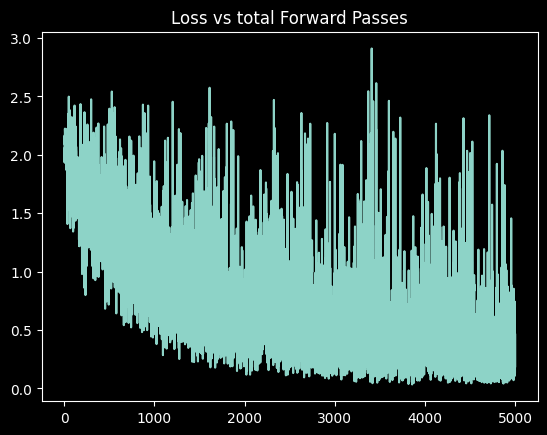

In [ ]:
cnn_trained = StochasticGradientDescent(cnn1,X,y,5000)

In [ ]:
cnn_trained.predict(X[2].reshape(int(len(X[1])**0.5),int(len(X[1])**0.5)))

array([0.00989595, 0.38089706, 0.11542079, 0.0081977 , 0.02574165,
       0.00082333, 0.01902936, 0.02510562, 0.41219853, 0.00269   ])

In [ ]:
y[2]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

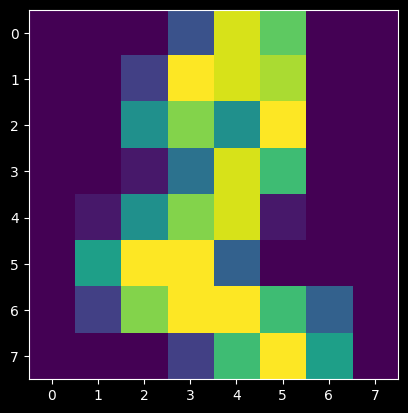

In [ ]:
plt.imshow(X[2].reshape(int(len(X[0])**0.5),int(len(X[0])**0.5)))

In [ ]:
correct = 0
incorrect = 0
for i in range(len(X)):
    pred1 = cnn_trained.predict(X[i].reshape(int(len(X[1])**0.5),int(len(X[1])**0.5)))
    temp = np.argmax(pred1)
    temp1 = np.argmax(y[i])
    if temp==temp1:
        correct+=1
    else:
        incorrect+=1

print(f"The accuracy of the trained model is: {correct*100/(correct+incorrect)} %")

The accuracy of the trained model is: 90.15025041736227 %


## Question 5

## Convolutional Layer for Multiple Output Channels Channels

In [ ]:
class ConvolutionLayerMultiChannel:
    def __init__(self,input_data,input_shape,pad_size = 1,filter_size=None,input_channels=1,output_channels=1,lr=0.001,activation=None):
        self.image = input_data
        self.temp = None
        self.activation = activation
        self.backup = input_data.copy()
        self.size = input_shape
        self.output_channels = output_channels
        self.nooffilters = output_channels
        self.filter_size = filter_size
        self.dl_dout = None
        self.pad_size = pad_size
        self.lr = lr
        self.input_channels = input_channels
        self.datapasser = None
        self.filter = self.generate_random_filters_2d(output_channels,input_channels,filter_size)
    def generate_random_filters_2d(self,num_rows, num_columns, filter_size):
        temp = []
        for j in range(self.output_channels):
            f1 = np.random.random((filter_size,filter_size))
            temp1 = []
            for i in range(self.input_channels):
                temp1.append(f1)
            temp.append(temp1)
        return np.array(temp)
    def padding(self):
        arr = self.image

        filter_size = self.filter_size
        p = filter_size // 2
        n = len(arr)
        p_n = n + 2 * p
        padded_img = np.zeros(shape=(p_n, p_n))
        for i in range(n):
            for j in range(n):
                padded_img[i + p][j + p] = arr[i][j]
        return padded_img
    def paddingone(self,arr1):
        arr = arr1

        filter_size = self.filter_size
        p = filter_size // 2
        n = len(arr)
        p_n = n + 2 * p
        padded_img = np.zeros(shape=(p_n, p_n))
        for i in range(n):
            for j in range(n):
                padded_img[i + p][j + p] = arr[i][j]
        return padded_img

    def computation(self,arr2, filters):
        ans = 0
        for i in range(len(arr2)):
            for j in range(len(arr2[0])):
                ans += arr2[i][j] * filters[i][j]
        return ans
    def helper_cross_correlation(self,channel,filter):
        pad_size = len(filter)
        n = self.size[0]
        filters = filter
        img = self.paddingone(channel)
        arr1 = img
        output_img = np.zeros(shape=(n, n))
        for i in range(n):
            for j in range(n):
                output_img[i][j] = self.computation(arr1[i:i + pad_size, j:j + pad_size], filters)
        return output_img
    def forward_pass(self):
        outputs = []
        for oc in range(self.output_channels):
            temp = []
            for ic in range(self.input_channels):
                final = self.helper_cross_correlation(self.image[ic],self.filter[oc][ic])
                temp.append(final)
            temp = np.array(temp)
            temp = np.sum(temp,axis=0)
            outputs.append(temp)
        output_img = np.array(outputs[0]).copy().reshape(-1)
        if len(outputs)>1:
            for l in range(1,len(outputs)):
                output_img = np.concatenate((output_img,np.array(outputs[l]).copy().reshape(-1)))
        self.datapasser = output_img
        output_img = self.activation().applyactivation(output_img)
        return output_img

    def reverse_filter(self):
        filter = self.filter
        n = len(filter)
        reversed_filter = np.zeros(shape=(n, n))
        for i in range(n):
            for j in range(n):
                reversed_filter[i][j] = filter[n - i - 1][n - j - 1]
        return reversed_filter
    def reverse_filterinp(self,filter):
        filter = filter
        n = len(filter)
        reversed_filter = np.zeros(shape=(n, n))
        for i in range(n):
            for j in range(n):
                reversed_filter[i][j] = filter[n - i - 1][n - j - 1]
        return reversed_filter
    def helper_convolution(self,pad_dl_dout,filter):
        img = self.image
        for ic in range(self.input_channels):
            m = len(filter)
            pad_size = len(filter)
            dl_dw = np.zeros(shape=(m, m))
            for i in range(m):
                for j in range(m):
                    dl_dw[i][j] += self.computation(pad_dl_dout[i:i + pad_size, j:j + pad_size], img[ic])

        return dl_dw
    def reshape_to_okk(self,input_array, output_channels, kernel_size):
        N = input_array.shape[0]
        output_array = input_array.reshape(output_channels, kernel_size, kernel_size)
        return output_array
    def backward_pass(self):
        dl_dout = self.dl_dout
        dl_douts = self.reshape_to_okk(self.dl_dout,self.output_channels,self.size[0])
        for oc in range(self.output_channels):
            pad_dl_dout = self.paddingone(dl_douts[oc])
            dl_dw = self.helper_convolution(pad_dl_dout,self.filter[oc][0])
            for ic in range(self.input_channels):
                self.filter[oc][ic]-=dl_dw
        self.image = self.backup.copy()
        return dl_dw


In [ ]:
class ConvolutionalNeuralNetworkMultiChannel:
    def __init__(self,input_data,y,Conv,Network,threshold=1e-3):
        self.Conv = Conv
        self.Network = Network
        self.input_data = input_data
        self.labels = y
        self.losses = []
        self.threshold = threshold
    def forwardpass(self):
        self.Conv.image = self.input_data
        self.Conv.backup = self.input_data.copy()
        next_pass_data = self.Conv.forward_pass()
        # next_pass_data = self.Conv.datapasser
        self.Network.layers[0].forwardassist = np.array([next_pass_data])
        self.Network.layers[len(self.Network.layers)-1].ytrain = np.array([self.labels])
        self.Network.layers[len(self.Network.layers)-1].feedytrain()
        # print(self.Conv.datapasser)
        loss = self.Network.forwardpass()
        return loss
    def backwardpass(self):
        self.Network.backwardpass()
        dl_dout = self.Network.layers[0].backwardassist
        temp9 = self.Conv.activation().cnngradient(self.Conv.datapasser)[:, np.newaxis]
        temp10 = np.array(dl_dout)*temp9
        self.Conv.dl_dout = temp10

        # self.Conv.dl_dout = dl_dout.reshape(self.Conv.size)
        self.Conv.backward_pass()
        loss = self.forwardpass()
        self.losses.append(loss)
        self.Conv.image = self.Conv.backup
        return
    def predict(self,X,y=None):
        self.Conv.image = X
        next_pass_data = self.Conv.forward_pass()
        self.Network.layers[0].forwardassist = np.array([next_pass_data])
        self.Network.layers[len(self.Network.layers)-1].architecture[0].labels = np.array([y])
        loss = self.Network.forwardpass(mode="predict")
        ypred = self.Network.layers[len(self.Network.layers)-1].forwardstore
        self.Conv.image = self.Conv.backup
        # print("The prediction for the given image is:",ypred)
        if y:
            print("The actual value of the label is:",y)
        return ypred
    def __lossplot__(self):
        plt.style.use('dark_background')
        fig, axs = plt.subplots(1, 1)
        axs.set_title("Loss vs total Forward Passes")
        for i, update in enumerate([self.losses]):
            axs.plot(update)
        plt.show()
    def train(self):
        loss = self.forwardpass()
        iterations = 0
        while loss>0:
            iterations+=1
            self.backwardpass()
            loss1 = self.forwardpass()
            if abs(loss1-loss)<self.threshold:
                break
        loss = loss1
        print(f"Converged in {iterations} epochs.")
        print("final loss is :",loss)
        return


In [ ]:
def StochasticGradientDescent(model,X,y,maxiterations):
    # while True:
    for i in tqdm(range(maxiterations),desc="Iterations"):
        # for j in range(len(X)):
            j = i%len(X)
            for k in range(32):
                temp = []
                temp1 = []
            model.input_data= np.array([X[j].reshape(int(len(X[j])**0.5),int(len(X[j])**0.5))])
            model.labels = y[j]
            model.forwardpass()
            model.backwardpass()
    model.__lossplot__()
    return model

## Question 6

In [ ]:
from sklearn.datasets import load_digits
from sklearn.datasets import fetch_openml
df = load_digits()
X = df["data"]
y = df["target"]
X = X/255
multilevels = len(np.unique(y))
y = one_hot_encode(y)
df = pd.DataFrame(X)

In [ ]:
# from sklearn.datasets import fetch_openml
# mnist = fetch_openml("mnist_784")
# X = mnist["data"].to_numpy()
# y = mnist["target"]
# X = X/255
# multilevels = len(np.unique(y))
# y = one_hot_encode(y)
# df = pd.DataFrame(X)

In [ ]:
cnn1 = ConvolutionalNeuralNetworkMultiChannel([],[],ConvolutionLayerMultiChannel([],input_shape=(8,8),filter_size=3,input_channels=1,output_channels=16,activation=Tanh),NeuralNetwork([Layer(layertype="input",noofneurons=8*8*16,activation=Linear),Layer(layertype="dense",noofneurons=10,activation=ReLU,lr=0.005),Layer(layertype="output",noofneurons=1,activation=Softmax,lossfunction=CrossEntropyLoss,lr=0.005,classificationfeatures=10)],inputdata=df,y_train=y))

In [ ]:
# ,Layer(layertype="dense",noofneurons=10,activation=Linear,lr=0.05)

Iterations: 100%|██████████| 2000/2000 [01:27<00:00, 22.83it/s]


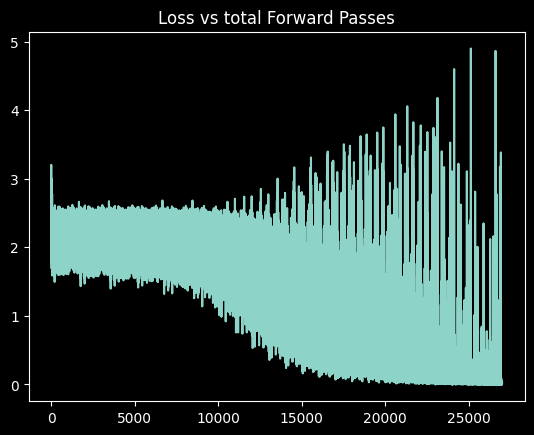

In [ ]:
cnn_trained = StochasticGradientDescent(cnn1,X,y,2000)

In [ ]:
cnn1.predict(np.array([X[1].reshape((int(len(X[1])**0.5),int(len(X[1])**0.5)))]))

array([0.06787051, 0.10024191, 0.12968161, 0.09544929, 0.12218122,
       0.09148083, 0.10853461, 0.14549208, 0.07171022, 0.06735772])

In [ ]:
y[1]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

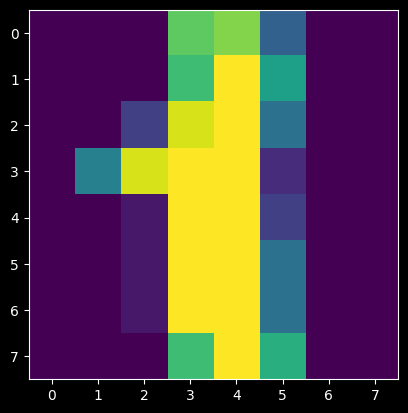

In [ ]:
plt.imshow(X[1].reshape((int(len(X[1])**0.5),int(len(X[1])**0.5))))

In [ ]:
correct = 0
incorrect = 0
for i in range(len(X)):
    pred1 = cnn1.predict([X[i].reshape(int(len(X[1])**0.5),int(len(X[1])**0.5))])
    temp = np.argmax(pred1)
    # print(temp)
    temp1 = np.argmax(y[i])
    if temp==temp1:
        correct+=1
    else:
        incorrect+=1

print(f"The accuracy of the trained model is: {correct*100/(correct+incorrect)} %")

The accuracy of the trained model is: 73.17751808569838 %
